In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import uniform
# import random as rand
# from scipy.stats import norm

# $\alpha$-stable distribution

In [2]:
def stable(alpha, beta, gamma, delta, n):
    Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
    W = np.random.exponential(1, n)
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
    if alpha != 1:
        Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
        X = gamma * Z + delta
    else:
        Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
        X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
    return X

# Levy processes

In [3]:
def simulate_process(Z, n, delta):
    X = [0]
    for k in range(n-1):
        X.append(X[k] + Z[k])
    return X

## Brownian motion

In [11]:
n = 1000 
delta = 0.5

In [12]:
Z_br = np.random.normal(0, delta, n)
X_br = simulate_process(Z_br, n, delta)

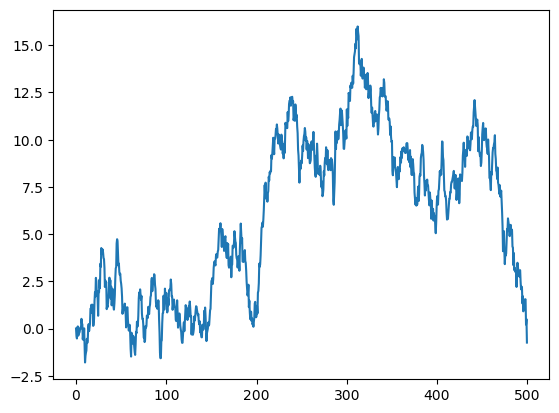

In [13]:
t_br = [k * delta for k in range(n)]
plt.plot(t_br, X_br)

In [16]:
X_br[1]

-0.3916333418331472

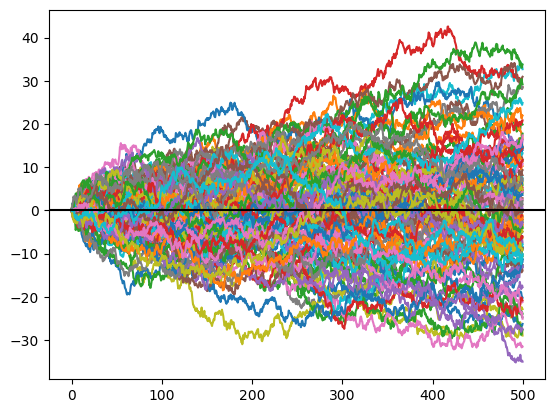

In [27]:
N = 100
X_br = []
for i in range(N):
    Z_br = np.random.normal(0, delta, n)
    X_br.append(simulate_process(Z_br, n, delta))
t_br = [k * delta for k in range(n)]
plt.plot(t_br, np.transpose(X_br))
plt.axhline(0, color = 'black')
plt.show()

## $\alpha$-stable motion

In [17]:
n = 1000
delta = 0.5

In [18]:
alpha = 1.5
beta = 0
gamma = delta**(1/alpha)
delt = 0
Z_st = stable(alpha, beta, gamma, delt, n)
X_st = simulate_process(Z_st, n, delta)

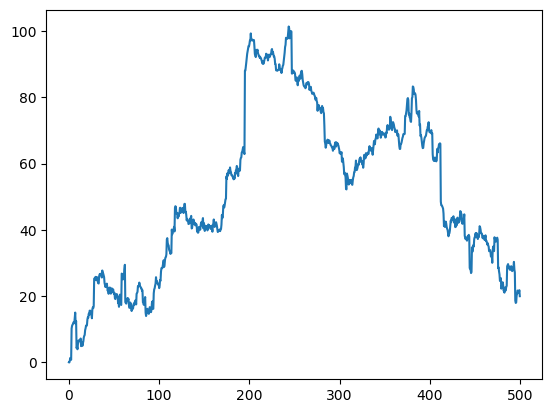

In [19]:
t_st = [k * delta for k in range(n)]
plt.plot(t_st, X_st)

In [20]:
X_st[1]

-0.06086408297904355

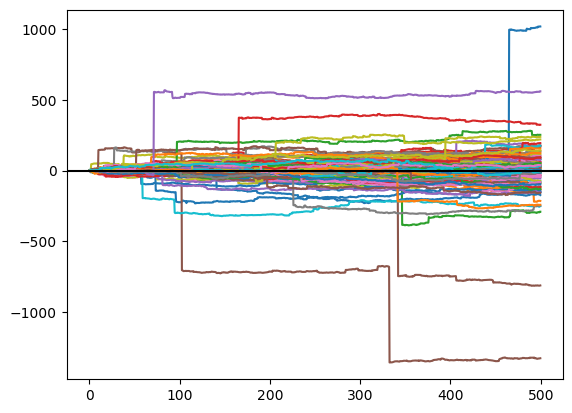

In [29]:
N = 100
X_st = []
alpha = 1.5
beta = 0
gamma = delta**(1/alpha)
delt = 0
for i in range(N):
    Z_st = stable(alpha, beta, gamma, delt, n)
    X_st.append(simulate_process(Z_st, n, delta))
t_st = [k * delta for k in range(n)]
plt.plot(t_st, np.transpose(X_st))
plt.axhline(0, color = 'black')
plt.show()